<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Вводные-данные" data-toc-modified-id="Вводные-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Вводные данные</a></span></li><li><span><a href="#Загрузка-и-ознакомление-с-данными" data-toc-modified-id="Загрузка-и-ознакомление-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и ознакомление с данными</a></span></li><li><span><a href="#Разведочный-анализ" data-toc-modified-id="Разведочный-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разведочный анализ</a></span></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li><li><span><a href="#Предварительная-обработка" data-toc-modified-id="Предварительная-обработка-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Предварительная обработка</a></span><ul class="toc-item"><li><span><a href="#Исследование-и-обработка-пропусков" data-toc-modified-id="Исследование-и-обработка-пропусков-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Исследование и обработка пропусков</a></span></li><li><span><a href="#Исследование-и-обработка-дубликатов" data-toc-modified-id="Исследование-и-обработка-дубликатов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Исследование и обработка дубликатов</a></span></li><li><span><a href="#Исследование-и-обработка-аномалий-и-выбросов" data-toc-modified-id="Исследование-и-обработка-аномалий-и-выбросов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Исследование и обработка аномалий и выбросов</a></span></li></ul></li><li><span><a href="#Отбор-финального-набора-обучающих-признаков" data-toc-modified-id="Отбор-финального-набора-обучающих-признаков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отбор финального набора обучающих признаков</a></span></li><li><span><a href="#Выбор-и-обучение-моделей" data-toc-modified-id="Выбор-и-обучение-моделей-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выбор и обучение моделей</a></span></li><li><span><a href="#Итоговая-оценка-качества-предсказания-лучшей-модели" data-toc-modified-id="Итоговая-оценка-качества-предсказания-лучшей-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Итоговая оценка качества предсказания лучшей модели</a></span></li><li><span><a href="#Анализ-важности-ее-признаков" data-toc-modified-id="Анализ-важности-ее-признаков-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Анализ важности ее признаков</a></span></li><li><span><a href="#Отчет-по-исследованию" data-toc-modified-id="Отчет-по-исследованию-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Отчет по исследованию</a></span></li></ul></div>

## Классификация музыкальных произведений по жанрам

**Описание задачи**

Сервис "МиФаСоль" расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Мои коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Моя задача разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

**Данные:**
- train.csv - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
- test.csv - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.
- sample_submit.csv - файл предсказаний в правильном формате.
- instance_id - идентификатор трека в тестовом наборе.
- music_genre - Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

**Описание полей данных:**
- instance_id - уникальный идентификатор трека
- track_name - название трека
- acousticness - акустичность
- danceability - танцевальность
- duration_ms -продолжительность в милисекундах
- energy - энергичность
- instrumentalness - инструментальность
- key - базовый ключ (нота) произведения
- liveness - привлекательность
- loudness - громкость
- mode - указывает на модальность (мажорную или минорную) трека
- speechiness - выразительность
- tempo - темп
- obtained_date - дата загрузки в сервис
- valence - привлекательность произведения для пользователей сервиса
- music_genre - музыкальный жанр

## Загрузка и ознакомление с данными

Выгрузим необходимые библиотеки для дальнейшей работы.

In [121]:
# !pip install phik
# !pip install imblearn
# !pip install scikit-learn==1.1.3
# !pip install catboost
# !pip install feature-engine

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import phik
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import set_config
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.ensemble import IsolationForest
from imblearn.base import FunctionSampler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.inspection import permutation_importance

pd.options.mode.chained_assignment = None

Выгрузим обучающий и тестовый датасеты, а также общую информацию о стоблцах и первые строки обучающего датасета.

In [123]:
data_train = pd.read_csv('kaggle_music_genre_train.csv')
data_test = pd.read_csv('kaggle_music_genre_test.csv')
#sample_submit = pd.read_csv('sample_submit.csv')

In [124]:
data_train.head(20)

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.480000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.4500,Country
1,26091.0,Toes Across The Floor,0.243000,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.5390,Rock
2,87888.0,First Person on Earth,0.228000,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.3440,Alternative
3,77021.0,No Te Veo - Digital Single,0.055800,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.9660,Hip-Hop
4,20852.0,Chasing Shadows,0.227000,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.5830,Alternative
5,43934.0,Eskimo Blue Day - Remastered,0.102000,0.308,392893.0,0.590,0.371000,D,0.1120,-11.703,Major,0.0345,145.758,4-Apr,0.4960,Blues
6,23450.0,Living On My Own,0.000234,0.655,218267.0,0.687,0.000024,A,0.0869,-11.789,Minor,0.0337,123.923,4-Apr,0.4110,Rock
7,28380.0,Para Machuchar Meu Coracao,0.953000,0.591,309813.0,0.109,0.357000,D#,0.0921,-17.975,Major,0.0449,130.597,4-Apr,0.3950,Jazz
8,70054.0,In the Mood,0.195000,0.647,283373.0,0.595,0.000118,A#,0.1290,-8.416,Minor,0.0336,73.478,4-Apr,0.5460,Jazz
9,74815.0,20.000 Volts,0.032300,0.537,237000.0,0.962,0.193000,C,0.1580,-2.749,Major,0.1210,160.031,4-Apr,0.4300,Electronic


In [125]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

Вывод:

Были выгружены требуемые библиотеки, а также обучающий и тестовый датасеты, в которых собраны характеристики музыкальных произведений и их жанры.

## Разведочный анализ

Построим гистограммы для обучающего датасета.

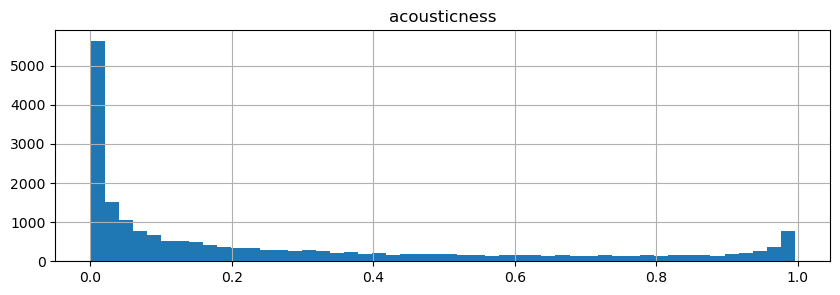

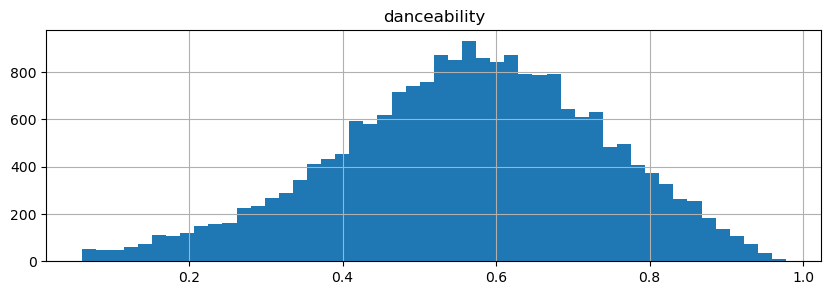

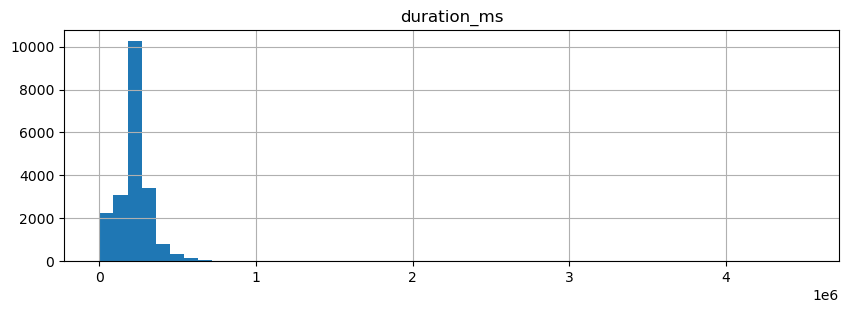

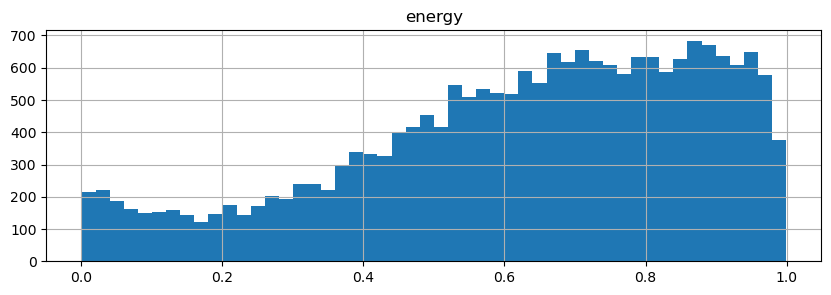

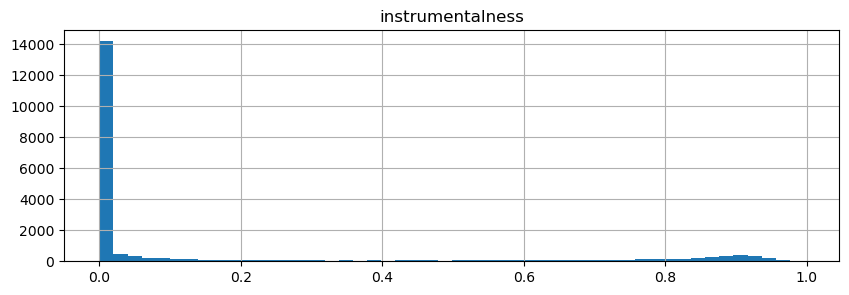

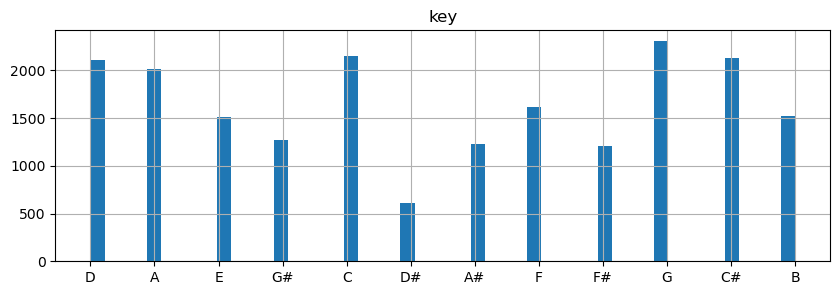

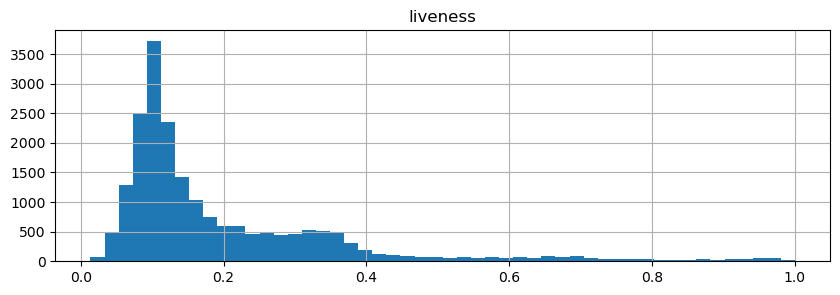

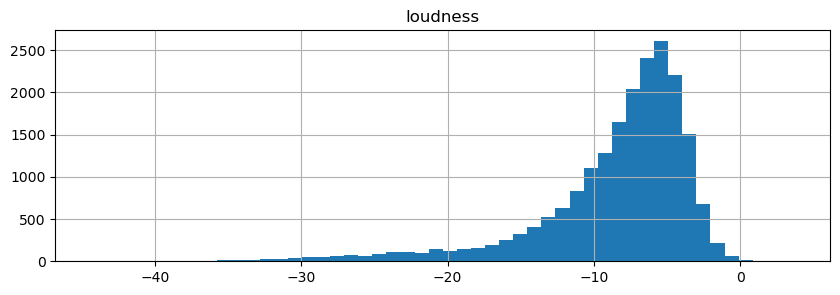

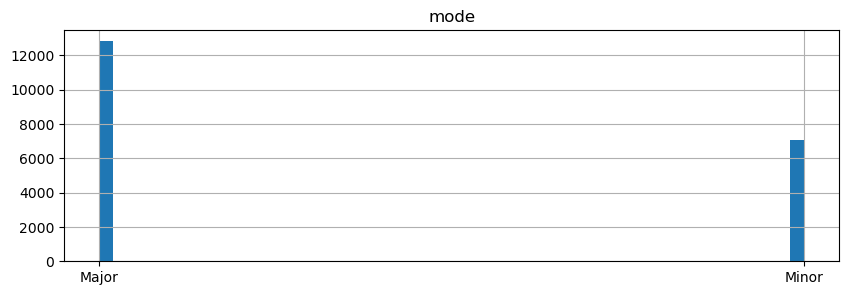

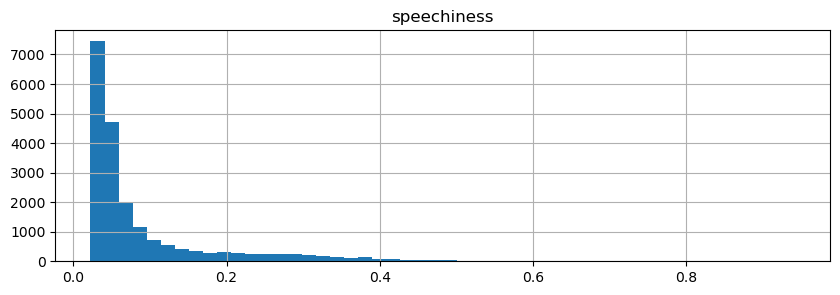

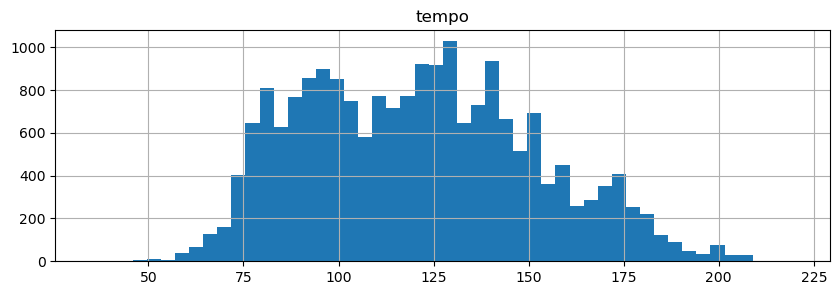

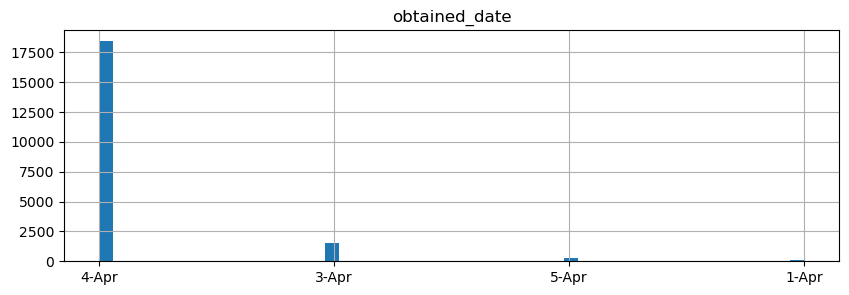

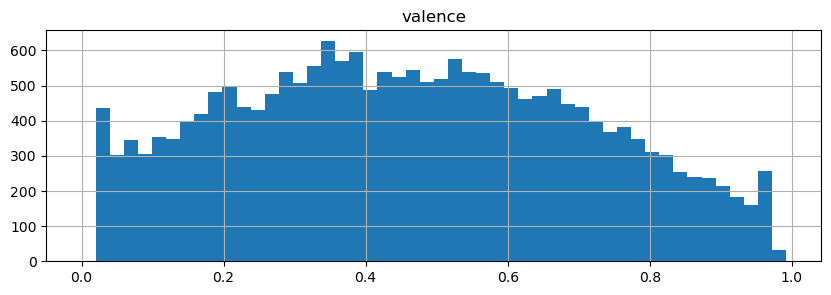

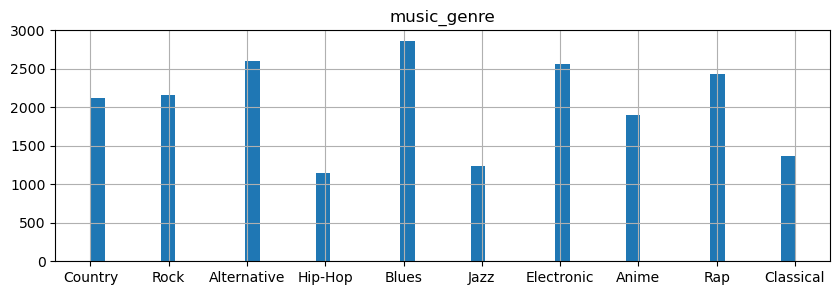

In [126]:
for c in data_train.drop(['instance_id', 'track_name'], axis=1).columns:
    plt.title(c)
    data_train[c].hist(bins=50, figsize=(10,3));
    plt.show()

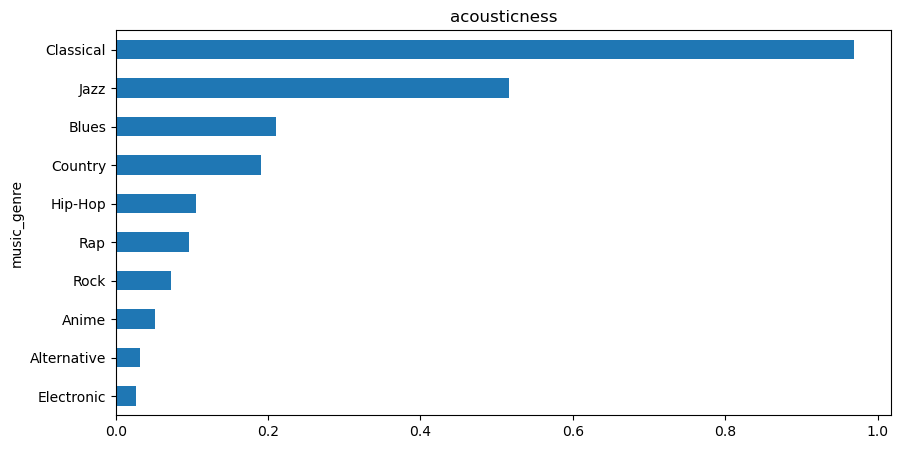

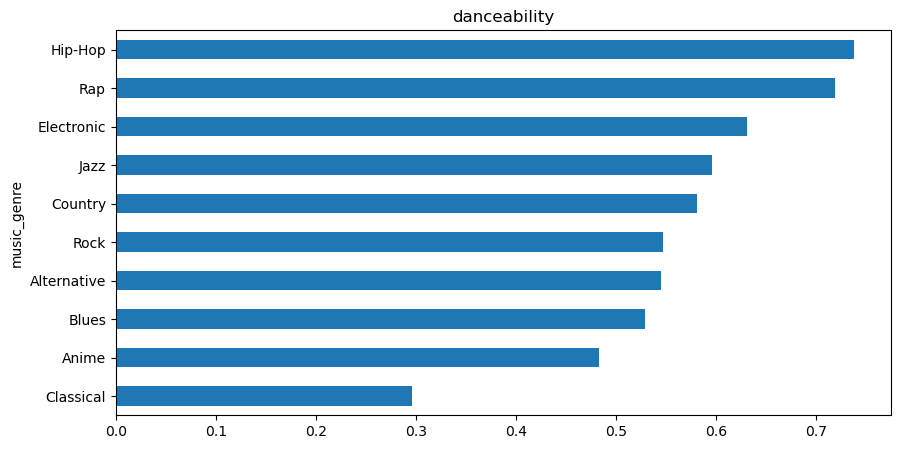

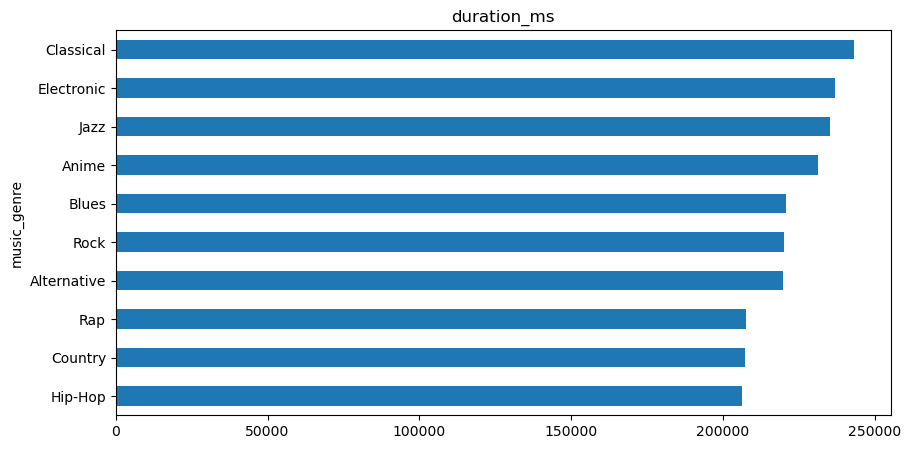

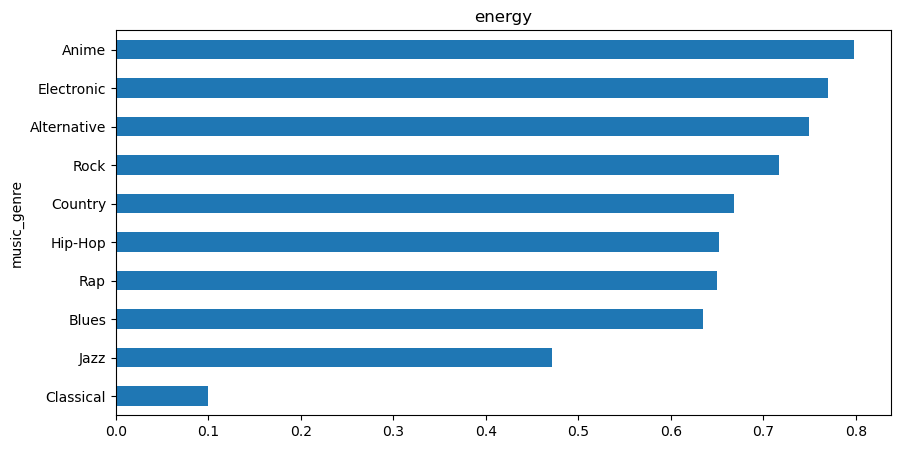

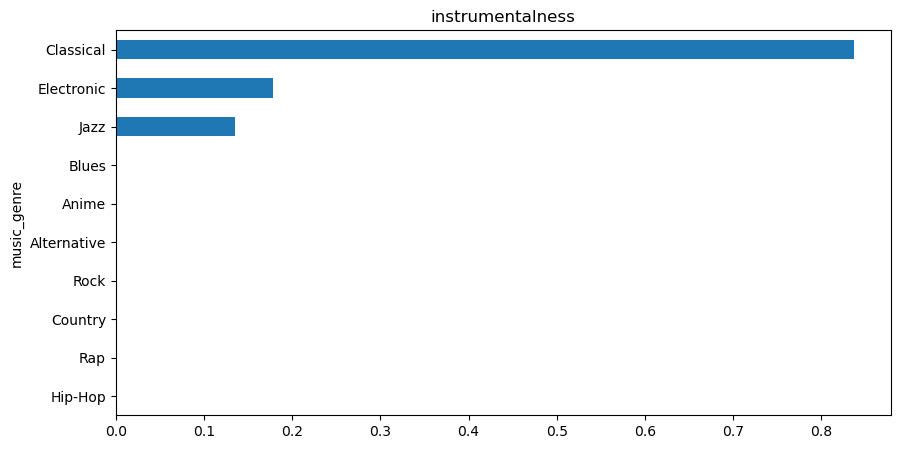

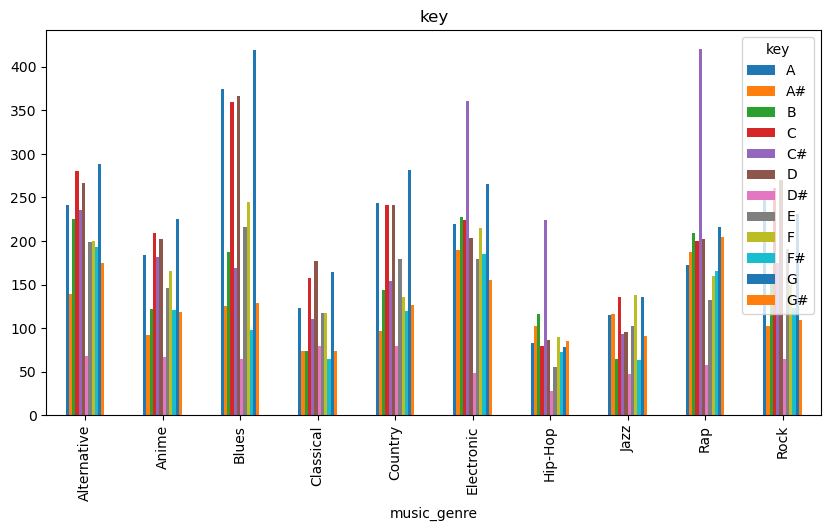

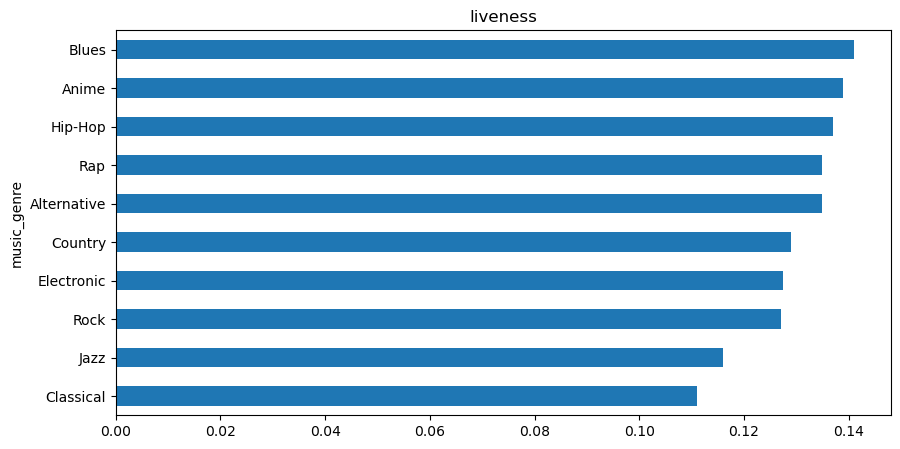

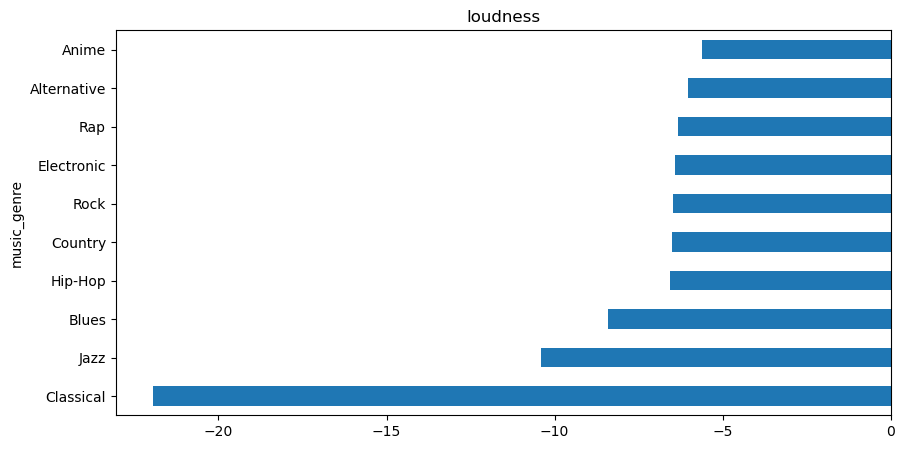

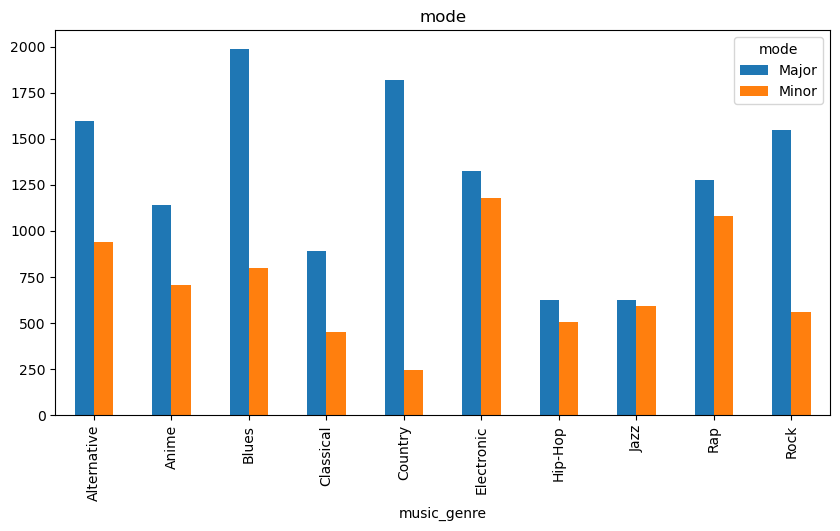

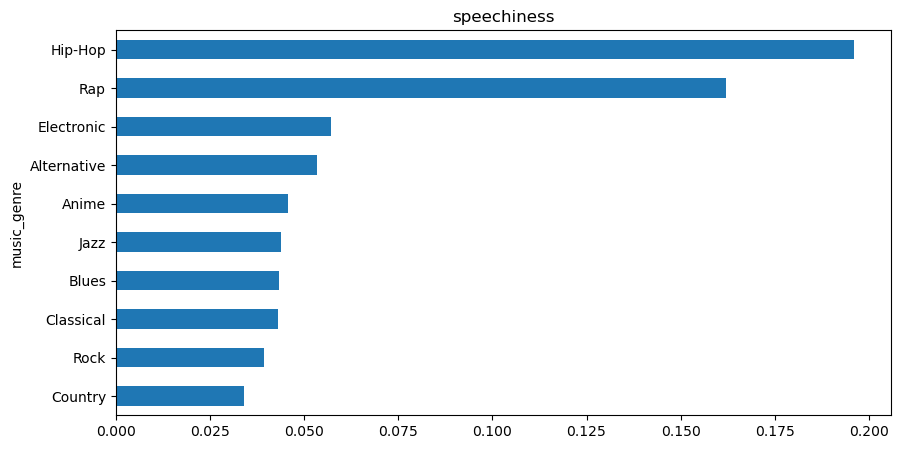

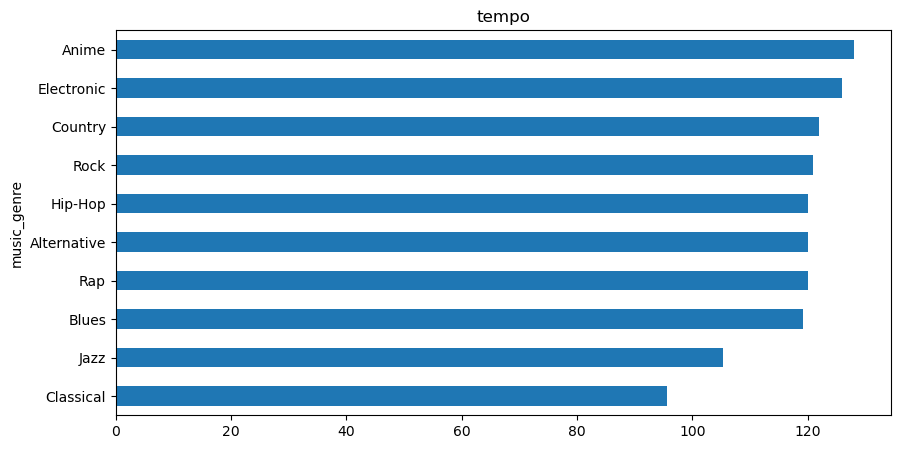

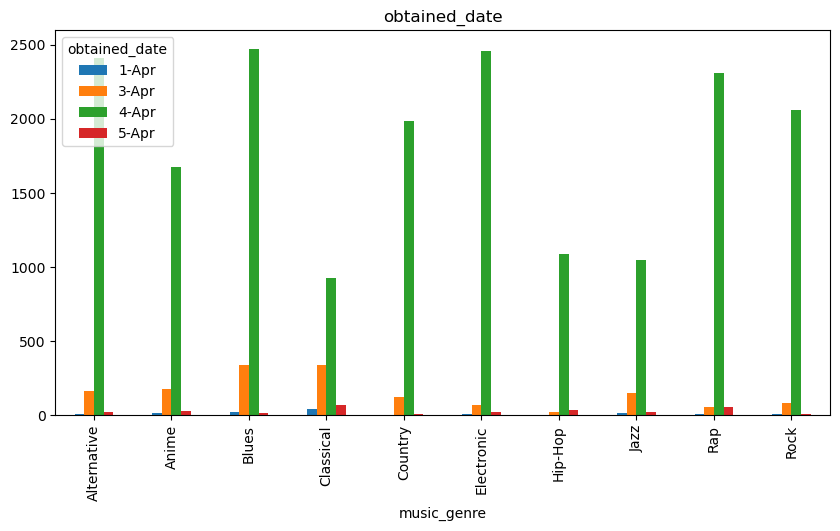

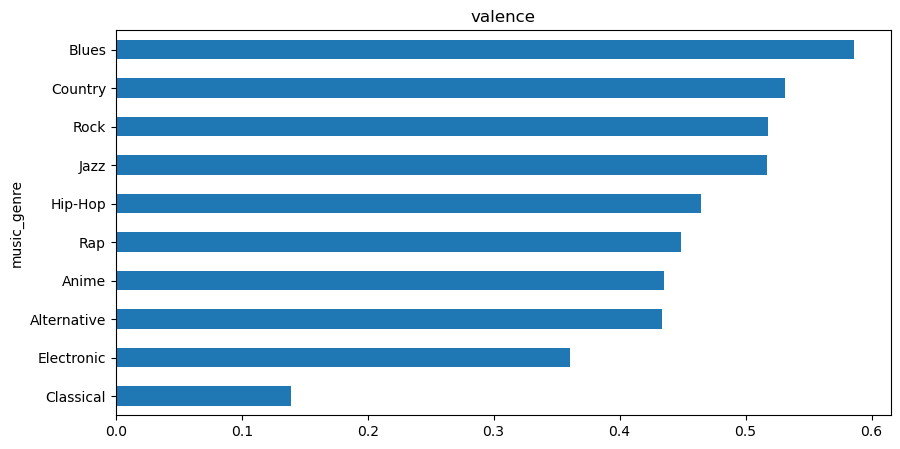

In [127]:
for c in data_train.drop(['music_genre', 'instance_id', 'track_name'], axis=1).columns:
    try:
        
        data_train.groupby('music_genre')[c].median().sort_values(ascending=True).plot(kind='barh', figsize=(10,5));
    except:
        data_train.pivot_table('instance_id', 'music_genre',c , 'count').plot(kind='bar', figsize=(10,5))
    plt.title(c)
    plt.show()

Вывод:

1. Акустичность распределена от 0 до 1, чаще всего встречаются значения близкие к нулю. Жанры, обладающие большей акустичностью - классика и джаз, а меньшей акустичностью - электронная музыка и альтернатива.
2. Танцевальность распределена нормально от 0 до 1, чаще всего встречаются значения близкие к 0,58. Жанры, обладающие большей танцевальностью - хип-хоп и рэп, а меньшей - классика и аниме.
3. Длительность музыки имееет выбросы (большая длительность треков) и аномалии (длителньость равна -1 сек), наиболее часто встречаются треки длительностью около 200 сек. Классические и электронные жанры имеют большую длитльность треков, хип-хоп и кантри - самую маленькую.
4. Энергичность распределена от 0 до 1, чаще всего встречаются значения близкие к 0.9. Жанры, обладающие большей энергичностью - аниме и электронная музыка, а меньшей - классика и джаз.
5. Инструменатальность распределена от 0 до 1, но подавляющее большинство значений близки к 0. Жанры, обладающие интсрументальностью - классика, электронная музыка и джаз.
6. Чаще всего встречающаяся базовая нота произведения - G и C, реже всего встречающаяся - D# и F#.
7. Привлекательность распределена от 0 до 1, чаще всего встречаются значения близкие к 0,1. Жанры, обладающие большей привлекательностью - блюз и аниме, а меньшей - классика и джаз.
8. Громкость распределена преимущественно в отрицательную сторону, чаще всего встречаются значения близкие к -5. Жанры, обладающие большей громкостью - аниме и альтернатива, а меньшей - классика и джаз.
9. Модальность трека чаще всего мажорная. 
10. Выразительность распределена от 0 до 1, чаще всего встречаются значения близкие к нулю. Жанры, обладающие большей выразительностью - хип-хоп и рэп, а меньшей - кантри и рок.
11. Чаще всего встречаются треки с темпом близким к 130. Больший темп у жанров - аниме и электроника, меньший - классика и джаз.
12. Чаще всего загружали на сервис треки 4 апреля.
13. Привлекательность распределена от 0 до 1, чаще всего встречаются значения близкие к 0,38. Жанры, обладающие большей привлекательностью - блюз и кантри, а меньшей - классика и электроника.
14. Музыкальные жанры распределены не совсем равномерно, но такого баланса будет достаточно для модели. Чаще всего встречаются - блюз, реже всего хип-хоп. 

## Проверка на мультиколлинеарность

Построим матрицу корреляции для обучающего датасета.

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


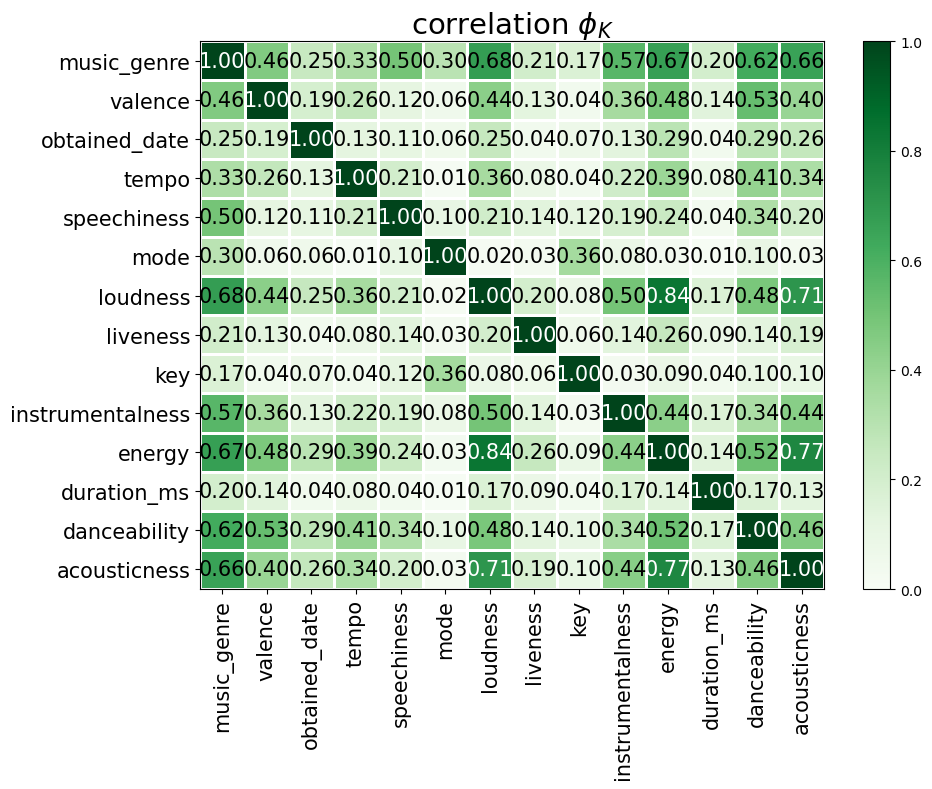

In [128]:
phic_matr = data_train.drop(['instance_id', 'track_name'], axis=1).phik_matrix()
plot_correlation_matrix(phic_matr.values, 
                        x_labels=phic_matr.columns, 
                        y_labels=phic_matr.index, 
                        vmin=0, 
                        vmax=1, 
                        color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

Вывод:

Наибольшее значение корреляции встречается между энергичностью и громкостью и равняется 0,84. Кореляяция с музыкальными жанрами наибольшая у громкости, энергичности и акустичности и равняется соответственно 0,68, 0,67 и 0,66. Сильной корреляции не было обнаружено, в дальнейшем будем использовать все признаки для обучения модели кроме названия треков и id. 

## Предварительная обработка

### Исследование и обработка пропусков

Посчитаем количество пропусков в обучающем и тестовом датасете.

In [129]:
print(data_train.isna().sum())
data_test.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64


instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
obtained_date         0
valence               0
dtype: int64

В дальнейшем пропуски в столбцах key, mode, tempo будут убраны с использованием pipeline при помощи IterativeImputer и SimpleImputer.

### Исследование и обработка дубликатов

Посчитаем количество дубликатов в обучающем и тестовом датасете.

In [130]:
print(('Количество дубликатов по всему трейну, не включая жанры, названия треков и id: {0}').format(data_train
                                                                                            .drop([
                                                                                                     'music_genre', 
                                                                                                     'instance_id',
                                                                                                     'track_name'
                                                                                                    ], axis=1)
                                                                                            .duplicated().sum()))
print(('Количество дубликатов по всему тесту, не включая жанры, названия треков и id: {0}').format(data_test
                                                                                           .drop([
                                                                                                     'instance_id',
                                                                                                     'track_name'
                                                                                                    ], axis=1)
                                                                                           .duplicated().sum()))

Количество дубликатов по всему трейну, не включая жанры, названия треков и id: 499
Количество дубликатов по всему тесту, не включая жанры, названия треков и id: 30


Удалим найденные дубликаты.

In [131]:
data_train = data_train.drop_duplicates(subset=data_train.drop(['music_genre', 'instance_id', 'track_name'], axis=1).columns)

Были найдены и удалены дубликаты по всем стоблцам, не включая жанры, названия треков и id.

### Исследование и обработка аномалий и выбросов

Изучим общие данные о каждом стоблце.

In [132]:
display(data_train.describe())
display(data_test.describe())

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,19895.000000,19895.000000,19895.000000,1.989500e+04,19895.000000,19895.000000,19895.000000,19895.000000,19895.000000,19453.000000,19895.000000
mean,55973.040060,0.276903,0.560979,2.201264e+05,0.623948,0.162412,0.198549,-8.591759,0.090741,120.985752,0.463667
std,20701.809808,0.322928,0.172091,1.278587e+05,0.252287,0.308377,0.167192,5.538828,0.097287,30.442440,0.243788
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,38140.500000,0.015350,0.450000,1.769535e+05,0.468000,0.000000,0.097300,-10.312000,0.035600,95.951000,0.271000
50%,56032.000000,0.122000,0.569000,2.194130e+05,0.665000,0.000158,0.129000,-7.073000,0.048900,120.015000,0.456000
75%,73916.500000,0.476000,0.682000,2.662465e+05,0.830000,0.092650,0.252000,-5.059000,0.094100,141.971000,0.653000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,5099.000000,5099.000000,5099.000000,5.099000e+03,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,4978.000000,5099.000000
mean,55643.871347,0.276324,0.561888,2.173974e+05,0.622030,0.165198,0.197924,-8.630186,0.092718,121.246463,0.465593
std,20762.384803,0.322657,0.170502,1.156374e+05,0.251829,0.311940,0.166241,5.619766,0.100130,29.875950,0.244217
min,20012.000000,0.000002,0.059600,-1.000000e+00,0.001540,0.000000,0.020400,-46.122000,0.022600,37.114000,0.020500
25%,37571.000000,0.016600,0.451000,1.737335e+05,0.465000,0.000000,0.096950,-10.231000,0.035700,96.070250,0.272000
50%,55246.000000,0.120000,0.568000,2.175000e+05,0.660000,0.000157,0.129000,-7.135000,0.048700,120.053500,0.458000
75%,73702.000000,0.460000,0.681000,2.642470e+05,0.826000,0.092750,0.248000,-5.127000,0.096550,141.934250,0.650000
max,91709.000000,0.996000,0.977000,1.360027e+06,0.999000,0.994000,0.990000,1.949000,0.918000,216.029000,0.982000


При изучении гистограмм в стоблце длительность трека были найдены выбросы и аномалии:
1. Заменим аномальные значения длительности треков равной -1 сек на nan, в дальнейшем заполним пропуски с использованием pipeline при помощи IterativeImputer. 
2. Удалим выбросы, в которых длительность трека больше 1000 сек.

In [133]:
data_train['duration_ms'] = data_train['duration_ms'].replace(-1, np.NaN)
data_test['duration_ms'] = data_test['duration_ms'].replace(-1, np.NaN)

In [134]:
(data_train['duration_ms'] > 1000000).sum()

30

In [135]:
data_train = data_train.query('duration_ms <= 1000000')

Были удалены выбросы в стоблце duration_ms, в дальнейшем будут заменены аномальные значения в стоблце duration_ms с использованием pipeline при помощи IterativeImputer.

Вывод:

1. Были изучены пропуски в датасетах, в дальнейшем пропуски в столбцах key, mode, tempo будут убраны с использованием pipeline при помощи IterativeImputer и SimpleImputer.
2. Были найдены и удалены дубликаты по всем стоблцам, не включая жанры, названия треков и id.
3. Были удалены выбросы в стоблце duration_ms, в дальнейшем будут заменены аномальные значения в стоблце duration_ms с использованием pipeline при помощи IterativeImputer.

## Отбор финального набора обучающих признаков

Разделим данные на фичи и таргеты.

In [136]:
features_train = data_train.drop(['instance_id', 'track_name', 'music_genre'], axis=1)
features_test = data_test.drop(['instance_id', 'track_name'], axis=1)
target_train = data_train['music_genre']

При помощи pipeline и column_transformer соберем свой конвейер, включающий:
1. Для численных столбцов заполнение пропусков при помощи IterativeImputer() и масштабирование данных при помощи StandardScaler().
2. Для категориальных столбцов заполнение пропусков при помощи SimpleImputer() по самому частому значению и кодирование данных при помощи OneHotEncoder().

In [137]:
cat_columns = features_train.select_dtypes(include='object').columns
num_columns = features_train.select_dtypes(include='number').columns

In [138]:
num_pipeline = make_pipeline(IterativeImputer(),
                             StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                             OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'))
column_transformer = make_column_transformer((num_pipeline, num_columns),
                                             (cat_pipeline, cat_columns))

Функция детектирования аномалий представлена ниже и в дальнейшем будем также включена в конвейер.

In [139]:
def outlier_detector_(X, y):
    outlier_index =  IsolationForest(contamination=0.01, random_state=42).fit_predict(X)
    return X[outlier_index == 1], y[outlier_index == 1] 

Вывод:

Данные были разделены на фичи и таргеты. Был создан конвейер при помощи pipeline и column_transformer, включающий в себя:
1. Для численных столбцов заполнение пропусков при помощи IterativeImputer() и масштабирование данных при помощи StandardScaler().
2. Для категориальных столбцов заполнение пропусков при помощи SimpleImputer() по самому частому значению и кодирование данных при помощи OneHotEncoder().
3. Функцию детектирования аномалий при помощи IsolationForest()

Также при разработке модели была применена балансировка данных при помощи SMOTE(), генерация новых полиномиальных комбинаций признаков с указанной степенью при помощи PolynomialFeatures() и был произведен отбор признаков при помощи SelectKBest(), но эффективности данные решения не показали, метрика модели ухудшалась при их применении. 

Была попытка провести стекинг, но были ошибки при применения стекинга и pipeline, если подскажете, как это можно сделать, то буду очень рада!

## Выбор и обучение моделей

Обучим модель RandomForestClassifier() при использования поиска по сетке при помощи GridSearchCV() с перебором параметров max_depth, max_features и n_estimators.

In [140]:
%%time
pipeline = make_pipeline(column_transformer,
                         FunctionSampler(func=outlier_detector_),
                         RandomForestClassifier(random_state=13))
params = {
    'n_estimators': [100],
    'max_depth': [15,30,45],
    'max_features':[6,10,14],
    }
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba_rfc = GridSearchCV(pipeline, 
                             param_grid=new_params,
                             verbose=3,
                             cv=2, 
                             scoring='f1_micro', 
                             n_jobs=-1)
grid_imba_rfc.fit(features_train, target_train)
print(grid_imba_rfc.best_params_)
print(grid_imba_rfc.best_score_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
{'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__n_estimators': 100}
0.47209355920393414
CPU times: total: 21.4 s
Wall time: 1min 8s


Модель RandomForestClassifier() при параметре n_estimators равному 100, параметре  max_depth равному 15 и параметре max_features равному 10 имеет наилучшую метрику f1_micro, которая равняется 0,472

Обучим модель CatBoostClassifier() при использования поиска по сетке при помощи GridSearchCV() с перебором параметров depth и learning_rate.

In [141]:
%%time
pipeline = make_pipeline(column_transformer,
                         FunctionSampler(func=outlier_detector_),
                         CatBoostClassifier(random_state=13))
params = {'depth'         : [4,6],
          'learning_rate' : [0.01,0.03,0.1],
          'iterations'    : [1000],
          'loss_function': ['MultiClass'],
         }
new_params = {'catboostclassifier__' + key: params[key] for key in params}
grid_imba_cbc = GridSearchCV(pipeline, 
                             param_grid=new_params,
                             cv=2, 
                             scoring='f1_micro',
                             verbose=2,
                             n_jobs=-1)
grid_imba_cbc.fit(features_train, target_train)
print(grid_imba_cbc.best_params_)
print(grid_imba_cbc.best_score_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
0:	learn: 2.2727235	total: 11.8ms	remaining: 11.8s
1:	learn: 2.2446012	total: 22.2ms	remaining: 11.1s
2:	learn: 2.2180735	total: 32.7ms	remaining: 10.9s
3:	learn: 2.1962787	total: 42.8ms	remaining: 10.7s
4:	learn: 2.1743064	total: 53ms	remaining: 10.6s
5:	learn: 2.1530889	total: 63.7ms	remaining: 10.6s
6:	learn: 2.1337159	total: 74.5ms	remaining: 10.6s
7:	learn: 2.1168263	total: 85.7ms	remaining: 10.6s
8:	learn: 2.0996591	total: 98.1ms	remaining: 10.8s
9:	learn: 2.0847697	total: 110ms	remaining: 10.9s
10:	learn: 2.0699095	total: 122ms	remaining: 11s
11:	learn: 2.0549918	total: 135ms	remaining: 11.2s
12:	learn: 2.0415471	total: 149ms	remaining: 11.3s
13:	learn: 2.0296473	total: 161ms	remaining: 11.3s
14:	learn: 2.0175499	total: 173ms	remaining: 11.4s
15:	learn: 2.0060033	total: 184ms	remaining: 11.3s
16:	learn: 1.9942856	total: 195ms	remaining: 11.3s
17:	learn: 1.9835357	total: 206ms	remaining: 11.2s
18:	learn: 1.9724711	total:

172:	learn: 1.5178514	total: 2.28s	remaining: 10.9s
173:	learn: 1.5171137	total: 2.29s	remaining: 10.9s
174:	learn: 1.5164205	total: 2.31s	remaining: 10.9s
175:	learn: 1.5156251	total: 2.32s	remaining: 10.9s
176:	learn: 1.5149050	total: 2.33s	remaining: 10.8s
177:	learn: 1.5141245	total: 2.35s	remaining: 10.8s
178:	learn: 1.5132302	total: 2.36s	remaining: 10.8s
179:	learn: 1.5125430	total: 2.37s	remaining: 10.8s
180:	learn: 1.5116199	total: 2.38s	remaining: 10.8s
181:	learn: 1.5109165	total: 2.4s	remaining: 10.8s
182:	learn: 1.5101449	total: 2.41s	remaining: 10.8s
183:	learn: 1.5092483	total: 2.42s	remaining: 10.8s
184:	learn: 1.5085200	total: 2.44s	remaining: 10.7s
185:	learn: 1.5077695	total: 2.45s	remaining: 10.7s
186:	learn: 1.5069493	total: 2.46s	remaining: 10.7s
187:	learn: 1.5063267	total: 2.48s	remaining: 10.7s
188:	learn: 1.5053888	total: 2.49s	remaining: 10.7s
189:	learn: 1.5046245	total: 2.5s	remaining: 10.7s
190:	learn: 1.5037148	total: 2.52s	remaining: 10.7s
191:	learn: 1.

337:	learn: 1.4294241	total: 4.54s	remaining: 8.9s
338:	learn: 1.4289890	total: 4.56s	remaining: 8.88s
339:	learn: 1.4287302	total: 4.57s	remaining: 8.87s
340:	learn: 1.4281563	total: 4.58s	remaining: 8.86s
341:	learn: 1.4278433	total: 4.6s	remaining: 8.85s
342:	learn: 1.4274703	total: 4.61s	remaining: 8.83s
343:	learn: 1.4271864	total: 4.62s	remaining: 8.81s
344:	learn: 1.4267923	total: 4.64s	remaining: 8.8s
345:	learn: 1.4264961	total: 4.65s	remaining: 8.79s
346:	learn: 1.4262817	total: 4.66s	remaining: 8.77s
347:	learn: 1.4258459	total: 4.67s	remaining: 8.76s
348:	learn: 1.4254905	total: 4.69s	remaining: 8.74s
349:	learn: 1.4251279	total: 4.7s	remaining: 8.73s
350:	learn: 1.4248191	total: 4.71s	remaining: 8.72s
351:	learn: 1.4244784	total: 4.73s	remaining: 8.7s
352:	learn: 1.4240956	total: 4.74s	remaining: 8.69s
353:	learn: 1.4236192	total: 4.76s	remaining: 8.68s
354:	learn: 1.4229948	total: 4.78s	remaining: 8.68s
355:	learn: 1.4226211	total: 4.79s	remaining: 8.67s
356:	learn: 1.422

500:	learn: 1.3826581	total: 6.79s	remaining: 6.76s
501:	learn: 1.3823243	total: 6.81s	remaining: 6.75s
502:	learn: 1.3820909	total: 6.82s	remaining: 6.74s
503:	learn: 1.3818710	total: 6.84s	remaining: 6.73s
504:	learn: 1.3815785	total: 6.86s	remaining: 6.72s
505:	learn: 1.3814091	total: 6.87s	remaining: 6.71s
506:	learn: 1.3812218	total: 6.88s	remaining: 6.69s
507:	learn: 1.3810296	total: 6.89s	remaining: 6.68s
508:	learn: 1.3808502	total: 6.91s	remaining: 6.66s
509:	learn: 1.3805889	total: 6.92s	remaining: 6.65s
510:	learn: 1.3803772	total: 6.93s	remaining: 6.63s
511:	learn: 1.3801664	total: 6.95s	remaining: 6.62s
512:	learn: 1.3799938	total: 6.96s	remaining: 6.61s
513:	learn: 1.3797834	total: 6.97s	remaining: 6.59s
514:	learn: 1.3796101	total: 6.99s	remaining: 6.58s
515:	learn: 1.3794142	total: 7s	remaining: 6.57s
516:	learn: 1.3792032	total: 7.01s	remaining: 6.55s
517:	learn: 1.3790600	total: 7.03s	remaining: 6.54s
518:	learn: 1.3788859	total: 7.04s	remaining: 6.52s
519:	learn: 1.3

674:	learn: 1.3483941	total: 9.06s	remaining: 4.36s
675:	learn: 1.3482402	total: 9.07s	remaining: 4.35s
676:	learn: 1.3480452	total: 9.09s	remaining: 4.33s
677:	learn: 1.3479328	total: 9.1s	remaining: 4.32s
678:	learn: 1.3477533	total: 9.11s	remaining: 4.31s
679:	learn: 1.3475161	total: 9.13s	remaining: 4.29s
680:	learn: 1.3473443	total: 9.14s	remaining: 4.28s
681:	learn: 1.3471398	total: 9.15s	remaining: 4.27s
682:	learn: 1.3469799	total: 9.16s	remaining: 4.25s
683:	learn: 1.3468182	total: 9.18s	remaining: 4.24s
684:	learn: 1.3466182	total: 9.19s	remaining: 4.23s
685:	learn: 1.3465004	total: 9.2s	remaining: 4.21s
686:	learn: 1.3463266	total: 9.21s	remaining: 4.2s
687:	learn: 1.3461336	total: 9.23s	remaining: 4.18s
688:	learn: 1.3459913	total: 9.24s	remaining: 4.17s
689:	learn: 1.3458139	total: 9.26s	remaining: 4.16s
690:	learn: 1.3455918	total: 9.27s	remaining: 4.14s
691:	learn: 1.3454254	total: 9.28s	remaining: 4.13s
692:	learn: 1.3452424	total: 9.3s	remaining: 4.12s
693:	learn: 1.34

845:	learn: 1.3216695	total: 11.5s	remaining: 2.1s
846:	learn: 1.3215157	total: 11.5s	remaining: 2.09s
847:	learn: 1.3214073	total: 11.6s	remaining: 2.07s
848:	learn: 1.3212218	total: 11.6s	remaining: 2.06s
849:	learn: 1.3211247	total: 11.6s	remaining: 2.05s
850:	learn: 1.3209017	total: 11.6s	remaining: 2.03s
851:	learn: 1.3207634	total: 11.6s	remaining: 2.02s
852:	learn: 1.3205696	total: 11.6s	remaining: 2.01s
853:	learn: 1.3204953	total: 11.7s	remaining: 1.99s
854:	learn: 1.3203097	total: 11.7s	remaining: 1.98s
855:	learn: 1.3201548	total: 11.7s	remaining: 1.97s
856:	learn: 1.3200390	total: 11.7s	remaining: 1.95s
857:	learn: 1.3198958	total: 11.7s	remaining: 1.94s
858:	learn: 1.3197334	total: 11.7s	remaining: 1.93s
859:	learn: 1.3196378	total: 11.8s	remaining: 1.91s
860:	learn: 1.3195059	total: 11.8s	remaining: 1.9s
861:	learn: 1.3193810	total: 11.8s	remaining: 1.89s
862:	learn: 1.3191950	total: 11.8s	remaining: 1.87s
863:	learn: 1.3190181	total: 11.8s	remaining: 1.86s
864:	learn: 1.

Модель CatBoostClassifier() при параметре iterations равному 1000, параметре depth равному 6 и параметре learning_rate равному 0,03 имеет наилучшую метрику f1_micro, которая равняется 0,483.

Обучим модель SVC() при использования поиска по сетке при помощи GridSearchCV() с перебором параметров C и gamma.

In [142]:
%%time
pipeline = make_pipeline(column_transformer,
                         FunctionSampler(func=outlier_detector_),
                         SVC(random_state=13))
params = {'C': [0.1,1,10], 
          'gamma': [1,5],
          'kernel': ['linear']} 
param_grid = {'svc__' + key: params[key] for key in params}  
grid_imba_svc = GridSearchCV(pipeline, 
                    param_grid, 
                    verbose=3, 
                    scoring='f1_micro', 
                    cv=2,
                    n_jobs=-1)
grid_imba_svc.fit(features_train, target_train)
print(grid_imba_svc.best_params_)
print(grid_imba_svc.best_score_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'linear'}
0.41398438057450254
CPU times: total: 22.2 s
Wall time: 1min 15s


Модель SVC() при параметре C равному 1, параметре gamma равному 1 и линейном решателе имеет наилучшую метрику f1_micro, которая равняется 0,414.

Вывод:

Были обучены следующие модели:
1. RandomForestClassifier() при использования поиска по сетке при помощи GridSearchCV() с перебором параметров max_depth, max_features и n_estimators.
2. CatBoostClassifier() при использования поиска по сетке при помощи GridSearchCV() с перебором параметров depth и learning_rate.
3. SVC() при использования поиска по сетке при помощи GridSearchCV() с перебором параметров C и gamma.

Были получены следующие результаты:
1. Модель RandomForestClassifier() при параметре n_estimators равному 100, параметре  max_depth равному 15 и параметре max_features равному 10 имеет наилучшую метрику f1_micro, которая равняется 0,472
2. CatBoostClassifier() при параметре iterations равному 1000, параметре depth равному 6 и параметре learning_rate равному 0,03 имеет наилучшую метрику f1_micro, которая равняется 0,483.
3. Модель SVC() при параметре C равному 1, параметре gamma равному 1 и линейном решателе имеет наилучшую метрику f1_micro, которая равняется 0,414.

Наилучшей моделью является CatBoostClassifier() при параметре iterations равному 1000, параметре depth равному 6 и параметре learning_rate равному 0,03 и имеет наилучшую метрику f1_micro, которая равняется 0,483.



## Итоговая оценка качества предсказания лучшей модели

Получим предсказания для наилучшей модели CatBoostClassifier() при параметре iterations равному 1000, параметре depth равному 6 и параметре learning_rate равному 0,03.

In [143]:
model_best = make_pipeline(column_transformer,
                           FunctionSampler(func=outlier_detector_),
                           CatBoostClassifier(random_state=13, 
                                            depth = 6, 
                                            learning_rate = 0.03, 
                                            iterations = 1000, 
                                            loss_function = 'MultiClass'))
model_best.fit(features_train, target_train)
predictions_test = model_best.predict(features_test)

0:	learn: 2.2677020	total: 38.3ms	remaining: 38.3s
1:	learn: 2.2359520	total: 78.1ms	remaining: 39s
2:	learn: 2.2051874	total: 118ms	remaining: 39.1s
3:	learn: 2.1792924	total: 157ms	remaining: 39.1s
4:	learn: 2.1539968	total: 199ms	remaining: 39.5s
5:	learn: 2.1294744	total: 235ms	remaining: 38.9s
6:	learn: 2.1069036	total: 275ms	remaining: 39s
7:	learn: 2.0860745	total: 314ms	remaining: 38.9s
8:	learn: 2.0669912	total: 352ms	remaining: 38.8s
9:	learn: 2.0494328	total: 392ms	remaining: 38.8s
10:	learn: 2.0314044	total: 433ms	remaining: 38.9s
11:	learn: 2.0151741	total: 471ms	remaining: 38.8s
12:	learn: 1.9980706	total: 510ms	remaining: 38.8s
13:	learn: 1.9839950	total: 548ms	remaining: 38.6s
14:	learn: 1.9693121	total: 584ms	remaining: 38.4s
15:	learn: 1.9552948	total: 623ms	remaining: 38.3s
16:	learn: 1.9430211	total: 660ms	remaining: 38.2s
17:	learn: 1.9301305	total: 698ms	remaining: 38.1s
18:	learn: 1.9181608	total: 738ms	remaining: 38.1s
19:	learn: 1.9047788	total: 782ms	remaining

162:	learn: 1.4427474	total: 6.43s	remaining: 33s
163:	learn: 1.4419498	total: 6.46s	remaining: 32.9s
164:	learn: 1.4410319	total: 6.5s	remaining: 32.9s
165:	learn: 1.4399921	total: 6.54s	remaining: 32.9s
166:	learn: 1.4389540	total: 6.58s	remaining: 32.8s
167:	learn: 1.4379909	total: 6.61s	remaining: 32.8s
168:	learn: 1.4369550	total: 6.65s	remaining: 32.7s
169:	learn: 1.4363358	total: 6.69s	remaining: 32.7s
170:	learn: 1.4355069	total: 6.73s	remaining: 32.6s
171:	learn: 1.4345512	total: 6.77s	remaining: 32.6s
172:	learn: 1.4335748	total: 6.8s	remaining: 32.5s
173:	learn: 1.4326326	total: 6.84s	remaining: 32.5s
174:	learn: 1.4317906	total: 6.88s	remaining: 32.4s
175:	learn: 1.4310936	total: 6.92s	remaining: 32.4s
176:	learn: 1.4302801	total: 6.96s	remaining: 32.4s
177:	learn: 1.4292747	total: 6.99s	remaining: 32.3s
178:	learn: 1.4284490	total: 7.03s	remaining: 32.2s
179:	learn: 1.4276579	total: 7.07s	remaining: 32.2s
180:	learn: 1.4265979	total: 7.11s	remaining: 32.2s
181:	learn: 1.42

322:	learn: 1.3409338	total: 13.1s	remaining: 27.5s
323:	learn: 1.3404760	total: 13.2s	remaining: 27.5s
324:	learn: 1.3400171	total: 13.2s	remaining: 27.4s
325:	learn: 1.3396379	total: 13.3s	remaining: 27.4s
326:	learn: 1.3391250	total: 13.3s	remaining: 27.4s
327:	learn: 1.3386865	total: 13.3s	remaining: 27.3s
328:	learn: 1.3382479	total: 13.4s	remaining: 27.3s
329:	learn: 1.3377773	total: 13.4s	remaining: 27.2s
330:	learn: 1.3370913	total: 13.5s	remaining: 27.2s
331:	learn: 1.3366327	total: 13.5s	remaining: 27.2s
332:	learn: 1.3362701	total: 13.5s	remaining: 27.1s
333:	learn: 1.3359317	total: 13.6s	remaining: 27.1s
334:	learn: 1.3356234	total: 13.6s	remaining: 27s
335:	learn: 1.3351645	total: 13.7s	remaining: 27s
336:	learn: 1.3347522	total: 13.7s	remaining: 26.9s
337:	learn: 1.3344127	total: 13.7s	remaining: 26.9s
338:	learn: 1.3338838	total: 13.8s	remaining: 26.9s
339:	learn: 1.3333456	total: 13.8s	remaining: 26.8s
340:	learn: 1.3328411	total: 13.9s	remaining: 26.8s
341:	learn: 1.33

484:	learn: 1.2784242	total: 19.6s	remaining: 20.8s
485:	learn: 1.2780605	total: 19.6s	remaining: 20.7s
486:	learn: 1.2777754	total: 19.6s	remaining: 20.7s
487:	learn: 1.2774395	total: 19.7s	remaining: 20.6s
488:	learn: 1.2770395	total: 19.7s	remaining: 20.6s
489:	learn: 1.2766192	total: 19.8s	remaining: 20.6s
490:	learn: 1.2761975	total: 19.8s	remaining: 20.5s
491:	learn: 1.2758690	total: 19.8s	remaining: 20.5s
492:	learn: 1.2755716	total: 19.9s	remaining: 20.4s
493:	learn: 1.2753324	total: 19.9s	remaining: 20.4s
494:	learn: 1.2750294	total: 19.9s	remaining: 20.3s
495:	learn: 1.2747780	total: 20s	remaining: 20.3s
496:	learn: 1.2744313	total: 20s	remaining: 20.3s
497:	learn: 1.2741172	total: 20.1s	remaining: 20.2s
498:	learn: 1.2739106	total: 20.1s	remaining: 20.2s
499:	learn: 1.2737026	total: 20.1s	remaining: 20.1s
500:	learn: 1.2733934	total: 20.2s	remaining: 20.1s
501:	learn: 1.2730016	total: 20.2s	remaining: 20.1s
502:	learn: 1.2727204	total: 20.2s	remaining: 20s
503:	learn: 1.2724

647:	learn: 1.2288267	total: 26.4s	remaining: 14.4s
648:	learn: 1.2285588	total: 26.5s	remaining: 14.3s
649:	learn: 1.2282943	total: 26.5s	remaining: 14.3s
650:	learn: 1.2281070	total: 26.6s	remaining: 14.2s
651:	learn: 1.2278512	total: 26.6s	remaining: 14.2s
652:	learn: 1.2276552	total: 26.7s	remaining: 14.2s
653:	learn: 1.2274554	total: 26.7s	remaining: 14.1s
654:	learn: 1.2271270	total: 26.7s	remaining: 14.1s
655:	learn: 1.2268577	total: 26.8s	remaining: 14s
656:	learn: 1.2265566	total: 26.8s	remaining: 14s
657:	learn: 1.2262570	total: 26.9s	remaining: 14s
658:	learn: 1.2258834	total: 26.9s	remaining: 13.9s
659:	learn: 1.2253917	total: 27s	remaining: 13.9s
660:	learn: 1.2250952	total: 27s	remaining: 13.8s
661:	learn: 1.2247829	total: 27s	remaining: 13.8s
662:	learn: 1.2244675	total: 27.1s	remaining: 13.8s
663:	learn: 1.2242879	total: 27.1s	remaining: 13.7s
664:	learn: 1.2240238	total: 27.2s	remaining: 13.7s
665:	learn: 1.2238141	total: 27.2s	remaining: 13.7s
666:	learn: 1.2236037	to

807:	learn: 1.1871664	total: 32.8s	remaining: 7.79s
808:	learn: 1.1867709	total: 32.8s	remaining: 7.75s
809:	learn: 1.1865526	total: 32.9s	remaining: 7.71s
810:	learn: 1.1862222	total: 32.9s	remaining: 7.66s
811:	learn: 1.1859543	total: 32.9s	remaining: 7.62s
812:	learn: 1.1857673	total: 33s	remaining: 7.58s
813:	learn: 1.1855483	total: 33s	remaining: 7.54s
814:	learn: 1.1851586	total: 33s	remaining: 7.5s
815:	learn: 1.1848324	total: 33.1s	remaining: 7.46s
816:	learn: 1.1844931	total: 33.1s	remaining: 7.42s
817:	learn: 1.1842239	total: 33.2s	remaining: 7.38s
818:	learn: 1.1838478	total: 33.2s	remaining: 7.34s
819:	learn: 1.1835666	total: 33.2s	remaining: 7.29s
820:	learn: 1.1832665	total: 33.3s	remaining: 7.25s
821:	learn: 1.1831094	total: 33.3s	remaining: 7.21s
822:	learn: 1.1829451	total: 33.3s	remaining: 7.17s
823:	learn: 1.1826761	total: 33.4s	remaining: 7.13s
824:	learn: 1.1824736	total: 33.4s	remaining: 7.09s
825:	learn: 1.1822182	total: 33.5s	remaining: 7.05s
826:	learn: 1.18193

969:	learn: 1.1474713	total: 39s	remaining: 1.21s
970:	learn: 1.1472340	total: 39.1s	remaining: 1.17s
971:	learn: 1.1469138	total: 39.1s	remaining: 1.13s
972:	learn: 1.1467916	total: 39.1s	remaining: 1.09s
973:	learn: 1.1465707	total: 39.2s	remaining: 1.04s
974:	learn: 1.1462524	total: 39.2s	remaining: 1s
975:	learn: 1.1459391	total: 39.3s	remaining: 966ms
976:	learn: 1.1457929	total: 39.3s	remaining: 925ms
977:	learn: 1.1455794	total: 39.3s	remaining: 885ms
978:	learn: 1.1453019	total: 39.4s	remaining: 845ms
979:	learn: 1.1449973	total: 39.4s	remaining: 805ms
980:	learn: 1.1447862	total: 39.5s	remaining: 764ms
981:	learn: 1.1446017	total: 39.5s	remaining: 724ms
982:	learn: 1.1444584	total: 39.5s	remaining: 684ms
983:	learn: 1.1441564	total: 39.6s	remaining: 644ms
984:	learn: 1.1439431	total: 39.6s	remaining: 603ms
985:	learn: 1.1436949	total: 39.7s	remaining: 563ms
986:	learn: 1.1434498	total: 39.7s	remaining: 523ms
987:	learn: 1.1432227	total: 39.7s	remaining: 483ms
988:	learn: 1.142

Подготовим данные к загрузке на kaggle.

In [144]:
submit = pd.DataFrame(data_test['instance_id'])
submit['music_genre'] = predictions_test

In [145]:
#submit.to_csv(r'C:\Users\Вика\Desktop\practicum\Master\12_submit.csv', index=False)

Вывод:

Итоговая оценка качества для модели CatBoostClassifier() при параметре iterations равному 1000, параметре depth равному 6 и параметре learning_rate равному 0,03 на платформе kaggle равняется 0,482.



## Анализ важности ее признаков

Проведем анализ важности признаков наилучшей модели при помощи permutation_importance().

In [146]:
importance = permutation_importance(model_best, features_train, target_train, scoring='f1_micro')

Построим график важности признаков.

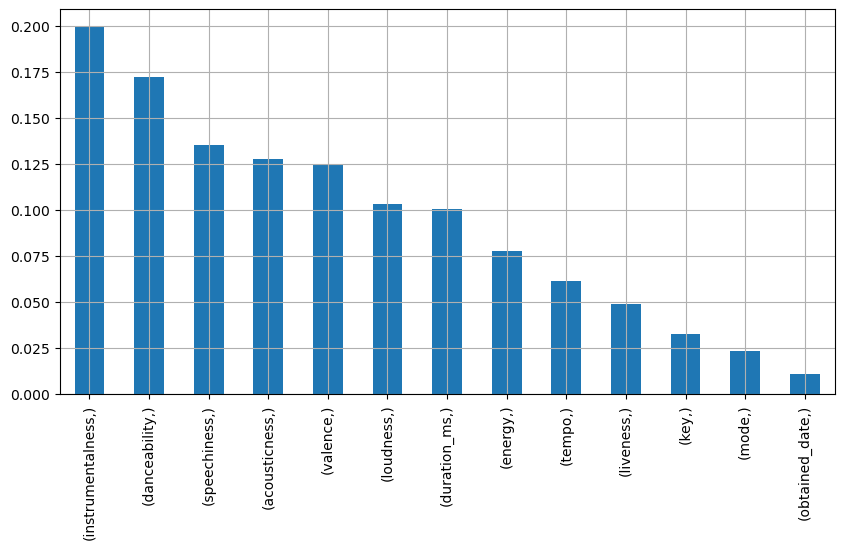

In [147]:
_ = (pd.Series(results_importance.importances_mean, index=[features_train.columns])
        .sort_values(ascending=False)
        .plot(kind="bar", figsize=(10,5), grid=True))

Вывод:

Важность признаков распределилась в следующем порядке:
1. инструментальность
2. танцевальность
3. выразительность
4. акустичность
5. привлекательность произведения для пользователей сервиса
6. громкость
7. продолжительность в милисекундах
8. энергичность
9. темп
10. привлекательность
11. базовый ключ
12. модальность
13. дата загрузки

## Отчет по исследованию

**Введение**

Необходимо правильно классифицировать музыкальные произведения по жанрам, чтобы улучшить работу рекомендательной системы популярного музыкального стримингового сервиса "МиФаСоль". Был подготовлен датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры.

Данные для обучения и тестирования:
- train.csv - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
- test.csv - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных.

Описание полей данных:
- instance_id - уникальный идентификатор трека
- track_name - название трека
- acousticness - акустичность
- danceability - танцевальность
- duration_ms -продолжительность в милисекундах
- energy - энергичность
- instrumentalness - инструментальность
- key - базовый ключ (нота) произведения
- liveness - привлекательность
- loudness - громкость
- mode - указывает на модальность (мажорную или минорную) трека
- speechiness - выразительность
- tempo - темп
- obtained_date - дата загрузки в сервис
- valence - привлекательность произведения для пользователей сервиса
- music_genre - музыкальный жанр

**Загрузка и ознакомление с данными**

В данном пункте были выгружены требуемые библиотеки, а также обучающий и тестовый датасеты, в которых собраны характеристики музыкальных произведений и их жанры.

**Полноценный разведочный анализ**

В данном пункте были построены гистограммы по всем стоблцам обучающего датасета, по которым были составлены следующие выводы:

1. Акустичность распределена от 0 до 1, чаще всего встречаются значения близкие к нулю. Жанры, обладающие большей акустичностью - классика и джаз, а меньшей акустичностью - электронная музыка и альтернатива.
2. Танцевальность распределена нормально от 0 до 1, чаще всего встречаются значения близкие к 0,58. Жанры, обладающие большей танцевальностью - хип-хоп и рэп, а меньшей - классика и аниме.
3. Длительность музыки имееет выбросы (большая длительность треков) и аномалии (длителньость равна -1 сек), наиболее часто встречаются треки длительностью около 200 сек. Классические и электронные жанры имеют большую длитльность треков, хип-хоп и кантри - самую маленькую.
4. Энергичность распределена от 0 до 1, чаще всего встречаются значения близкие к 0.9. Жанры, обладающие большей энергичностью - аниме и электронная музыка, а меньшей - классика и джаз.
5. Инструменатальность распределена от 0 до 1, но подавляющее большинство значений близки к 0. Жанры, обладающие интсрументальностью - классика, электронная музыка и джаз.
6. Чаще всего встречающаяся базовая нота произведения - G и C, реже всего встречающаяся - D# и F#.
7. Привлекательность распределена от 0 до 1, чаще всего встречаются значения близкие к 0,1. Жанры, обладающие большей привлекательностью - блюз и аниме, а меньшей - классика и джаз.
8. Громкость распределена преимущественно в отрицательную сторону, чаще всего встречаются значения близкие к -5. Жанры, обладающие большей громкостью - аниме и альтернатива, а меньшей - классика и джаз.
9. Модальность трека чаще всего мажорная. 
10. Выразительность распределена от 0 до 1, чаще всего встречаются значения близкие к нулю. Жанры, обладающие большей выразительностью - хип-хоп и рэп, а меньшей - кантри и рок.
11. Чаще всего встречаются треки с темпом близким к 130. Больший темп у жанров - аниме и электроника, меньший - классика и джаз.
12. Чаще всего загружали на сервис треки 4 апреля.
13. Привлекательность для пользователя распределена от 0 до 1, чаще всего встречаются значения близкие к 0,38. Жанры, обладающие большей привлекательностью - блюз и кантри, а меньшей - классика и электроника.
14. Музыкальные жанры распределены не совсем равномерно, но такого баланса будет достаточно для модели. Чаще всего встречаются - блюз, реже всего хип-хоп. 

**Проверка на мультиколлинеарность**

В данном пункте была построена матрица корреляции. Наибольшее значение корреляции встречается между энергичностью и громкостью и равняется 0,84. Кореляяция с музыкальными жанрами наибольшая у громкости, энергичности и акустичности и равняется соответственно 0,68, 0,67 и 0,66. Сильной корреляции не было обнаружено, в дальнейшем будем использовать все признаки для обучения модели кроме названия треков и id. 

**Предварительная обработка**

Были изучены пропуски в датасетах, в дальнейшем пропуски в столбцах key, mode, tempo будут убраны с использованием pipeline при помощи IterativeImputer и SimpleImputer.

Были найдены и удалены дубликаты по всем стоблцам, не включая жанры, названия треков и id.

Были удалены выбросы в стоблце duration_ms, в дальнейшем будут заменены аномальные значения в стоблце duration_ms с использованием pipeline при помощи IterativeImputer.

**Отбор финального набора обучающих признаков**

Данные были разделены на фичи и таргеты. Был создан конвейер при помощи pipeline и column_transformer, включающий в себя:
1. Для численных столбцов заполнение пропусков при помощи IterativeImputer() и масштабирование данных при помощи StandardScaler().
2. Для категориальных столбцов заполнение пропусков при помощи SimpleImputer() по самому частому значению и кодирование данных при помощи OneHotEncoder().
3. Функцию детектирования аномалий при помощи IsolationForest()

Также при разработке модели была применена балансировка данных при помощи SMOTE(), генерация новых полиномиальных комбинаций признаков с указанной степенью при помощи PolynomialFeatures() и был произведен отбор признаков при помощи SelectKBest(), но эффективности данные решения не показали, метрика модели ухудшалась при их применении. 

**Выбор и обучение моделей**

Были обучены следующие модели:
1. RandomForestClassifier() при использования поиска по сетке при помощи GridSearchCV() с перебором параметров max_depth, max_features и n_estimators.
2. CatBoostClassifier() при использования поиска по сетке при помощи GridSearchCV() с перебором параметров depth и learning_rate.
3. SVC() при использования поиска по сетке при помощи GridSearchCV() с перебором параметров C и gamma.

Были получены следующие результаты:
1. Модель RandomForestClassifier() при параметре n_estimators равному 100, параметре  max_depth равному 15 и параметре max_features равному 10 имеет наилучшую метрику f1_micro, которая равняется 0,472
2. CatBoostClassifier() при параметре iterations равному 1000, параметре depth равному 6 и параметре learning_rate равному 0,03 имеет наилучшую метрику f1_micro, которая равняется 0,483.
3. Модель SVC() при параметре C равному 1, параметре gamma равному 1 и линейном решателе имеет наилучшую метрику f1_micro, которая равняется 0,414.

Наилучшей моделью является CatBoostClassifier() при параметре iterations равному 1000, параметре depth равному 6 и параметре learning_rate равному 0,03 и имеет наилучшую метрику f1_micro, которая равняется 0,483.

**Итоговая оценка качества предсказания лучшей модели**

Итоговая оценка качества для модели CatBoostClassifier() при параметре iterations равному 1000, параметре depth равному 6 и параметре learning_rate равному 0,03 на платформе kaggle равняется 0,482.

**Анализ важности ее признаков**

Был проведен анализ важности признаков наилучшей модели при помощи permutation_importance().

Важность признаков распределилась в следующем порядке:
1. инструментальность
2. танцевальность
3. выразительность
4. акустичность
5. привлекательность произведения для пользователей сервиса
6. громкость
7. продолжительность в милисекундах
8. энергичность
9. темп
10. привлекательность
11. базовый ключ
12. модальность
13. дата загрузки
